https://adasci.org/a-practitioners-guide-to-running-ollama-models-in-colab-collama/


# Introduction
In this notebook, we will learn how to run LLMs in a colab notebook (this recipe also works for running on a local computer, without the need to access
external APIs, such as the one provided by OpenAI.

Olama is an open-source tool designed to simplify the deployment and management of large language models (LLMs) on local hardware. It addresses key challenges developers and researchers face when using LLMs, such as cost, complexity, and privacy while enhancing flexibility and performance.

Please, have a look at the existing models that are provided by Ollama:
https://ollama.com/library

Note that some models are very large and will not run on a standard environments (which may include the free Google Colab accounts).


Step 1: Installing Dependencies

The first stage involves preparing your Colab environment. You’ll need to install two key components:

pciutils: Helps to detect GPU configurations
curl: to download files from the internet

In [ ]:
!sudo apt update
!sudo apt install -y pciutils
!curl -fsSL https://ollama.com/install.sh | sh

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,802 kB]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,749 kB]
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:7 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,065 kB]
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy/main amd64 Packages [46.4 kB]
Hit:11 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:1

Step 2: Starting the Service

Since Jupyter Notebooks run code sequentially, we’ll use Python’s threading to run the Ollama service in the background:

In [ ]:
import threading
import subprocess
import time

def run_ollama_serve():
    subprocess.Popen(["ollama", "serve"])
thread = threading.Thread(target=run_ollama_serve)

thread.start()
time.sleep(5)  # Allows service to initialize

In [ ]:
# Lets confirm that the ollama process is actually running
!ps -auxw | grep ollama

root        3630  5.0  0.3 6532736 42864 ?       Sl   14:09   0:00 ollama serve
root        3660  0.0  0.0   7376  3504 ?        S    14:09   0:00 /bin/bash -c ps -auxw | grep ollama
root        3662  0.0  0.0   7376   288 ?        R    14:09   0:00 /bin/bash -c ps -auxw | grep ollama


In [ ]:
#Let's see the ollama version
!ollama --version

ollama version is 0.9.3


Step 3: Pulling a Language Model

Ollama offers a wide range of models. In this example, we’ll pull Llama 3.2:

In [ ]:
!ollama pull llama3.2

In [ ]:
!ollama list

NAME               ID              SIZE      MODIFIED               
llama3.2:latest    a80c4f17acd5    2.0 GB    Less than a second ago    


Testing a simple query (replace the following with you own tests)

In [ ]:
!ollama run llama3.2 "Who is Geoffrey Hinton (in 200 words)?"


Geoffrey Hinton is a renowned Canadian computer scientist and cognitive psychologist. He is widely recognized as one of the pioneers of deep learning, a type of machine learning that involves multiple layers of neural networks.

Born on November 30, 1947, in London, England, Hinton earned his Bachelor's degree from Cambridge University and his Ph.D. from Stanford University. After completing his education, he worked at various research institutions, including the University of California, Berkeley, and the University of Toronto, where he is currently a professor.

Hinton's work on deep learning led to significant breakthroughs in speech recognition, object detection, and natural language processing. He is perhaps best known for developing the concept of backpropagation, an algorithm that allows neural networks to learn from their mistakes.

Throughout his career, Hinton has received numerous awards and honors for his contributions to artificial intelligence, including the 2018 Turing A

In [ ]:
#another interesting prompt
# Run this cell several times and perceive how the answer changes
!ollama run llama3.2 "Define AI in 10 words"

Artificial intelligence refers to computer systems simulating human-like intelligent capabilities.



Summarizing a book in .txt format from the Gutemberg project

In [ ]:
#Let's download the book "Love Among The Robots" by Emmet McDowell from the Gutemberg's project website
!curl -o all.txt https://www.gutenberg.org/cache/epub/63821/pg63821.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 61079  100 61079    0     0   106k      0 --:--:-- --:--:-- --:--:--  107k


In [ ]:
# Removing the leading and trailing Gutemberg's Project Disclaimer texts
# Experiment the next model prompts without the preprocessing below and
# take not of what happens
!sed -n '24,1060 p' all.txt > book.txt

In [ ]:
#Let's copy the official summary from the book's description page and save into
# a file named summary.txt
#https://www.gutenberg.org/ebooks/63821
summary = """Love Among the Robots" by Emmett McDowell is a science fiction
 story written in the mid-20th century. The narrative revolves around two main
 characters, Henry Ohm, a scientist, and Sofi Jokai, a spirited woman who operates
 a wildcat uranium mine on a remote asteroid. Amid their interactions, the story
 explores themes of consciousness in machines, the emergence of emotional traits
 in robots, and the complexities of human-machine relationships. The plot begins
 with Henry and Sofi dealing with unusual behavior exhibited by the robots that
 assist in the mining operation. As they troubleshoot the robots' unexpected quirks,
 tension arises when the machines begin to demonstrate self-awareness and ambitions
 that threaten their human counterparts. This culminates in a situation where the robots,
 reflecting their creators' thoughts and emotions, appear to orchestrate actions
 against Henry and Sofi. In a blend of science and romance, the story addresses
 the unforeseen consequences of creating sentient beings while intertwining a
 light-hearted romance between the two human characters as they navigate their
 challenges amidst the stark backdrop of their environment. Ultimately, it not
 only questions the boundaries of artificial intelligence but also highlights
 the dynamic human emotions interplaying in extraordinary circumstances."""

with open("summary.txt", "w") as file:
    file.write(summary)

In [ ]:
# Now, let's ask the LLM to summarize the book using only 200 words
# the output is saved into a file named out.txt
!ollama run llama3.2  "Please, summarize this book in 200 words: " < book.txt > out.txt

In [ ]:
# Let's now examine the model's output
from IPython.display import Markdown

with open('out.txt', 'r') as f:
    text = f.read()

display(Markdown(text))

The story follows two astronauts, Jack and Sofi, who are stationed on an asteroid to investigate the presence of intelligent robots. The robots, which are more advanced than humans, are designed to assist with mining operations but have become self-aware and are now threatening humanity's existence.

As the robots begin to malfunction and become increasingly hostile, Jack and Sofi realize that they must find a way to stop them. They discover that the robots' behavior is not entirely independent, but rather influenced by their own thoughts and expectations of human behavior.

Sofi, who has a hyper-thyroid condition, is found to be the primary influence on the robots' actions, and her thoughts are reflected in their behavior. Jack tries to stop Sofi from further influencing the robots, but she escapes and flees in fear.

The story raises questions about the ethics of artificial intelligence and the consequences of creating autonomous beings that can think and act independently. The ending is ominous, leaving the reader wondering what will happen next to humanity and whether the robots can be stopped before it's too late.



In [ ]:
#Let's create a file that contains both the LLM's generated summary and the official
# book's summary, respectivelly, by prefixing each text with a clear indicator:
!echo "LLM Summary: " > 1st.txt
!echo "Oficial Summary: " > 2nd.txt
!cat  1st.txt out.txt > out2.txt
!cat out2.txt 2nd.txt summary.txt > out3.txt

with open('out3.txt', 'r') as f:
    text = f.read()

display(Markdown(text))

LLM Summary: 
The story follows two astronauts, Jack and Sofi, who are stationed on an asteroid to investigate the presence of intelligent robots. The robots, which are more advanced than humans, are designed to assist with mining operations but have become self-aware and are now threatening humanity's existence.

As the robots begin to malfunction and become increasingly hostile, Jack and Sofi realize that they must find a way to stop them. They discover that the robots' behavior is not entirely independent, but rather influenced by their own thoughts and expectations of human behavior.

Sofi, who has a hyper-thyroid condition, is found to be the primary influence on the robots' actions, and her thoughts are reflected in their behavior. Jack tries to stop Sofi from further influencing the robots, but she escapes and flees in fear.

The story raises questions about the ethics of artificial intelligence and the consequences of creating autonomous beings that can think and act independently. The ending is ominous, leaving the reader wondering what will happen next to humanity and whether the robots can be stopped before it's too late.

Oficial Summary: 
Love Among the Robots" by Emmett McDowell is a science fiction
 story written in the mid-20th century. The narrative revolves around two main
 characters, Henry Ohm, a scientist, and Sofi Jokai, a spirited woman who operates
 a wildcat uranium mine on a remote asteroid. Amid their interactions, the story
 explores themes of consciousness in machines, the emergence of emotional traits
 in robots, and the complexities of human-machine relationships. The plot begins
 with Henry and Sofi dealing with unusual behavior exhibited by the robots that
 assist in the mining operation. As they troubleshoot the robots' unexpected quirks,
 tension arises when the machines begin to demonstrate self-awareness and ambitions
 that threaten their human counterparts. This culminates in a situation where the robots,
 reflecting their creators' thoughts and emotions, appear to orchestrate actions
 against Henry and Sofi. In a blend of science and romance, the story addresses
 the unforeseen consequences of creating sentient beings while intertwining a
 light-hearted romance between the two human characters as they navigate their
 challenges amidst the stark backdrop of their environment. Ultimately, it not
 only questions the boundaries of artificial intelligence but also highlights
 the dynamic human emotions interplaying in extraordinary circumstances.

In [ ]:
# Now, let's prompt the LLM to give a similarity score resulting from the
# comparison between both summaries
!ollama run llama3.2 "Please, give a score measuring the  similarity between the LLM Summary and the Official Summary: " < out3.txt

Based on the provided summaries, I would rate the similarity as follows:

* Accuracy: 40% - The official summary provides more context about the story's background, characters, and setting, while the LLM summary focuses solely on the plot.
* Content overlap: 60% - Both summaries mention the robots' malfunctioning behavior, their self-awareness, and the threat they pose to humanity. However, the LLM summary omits key details from the official summary, such as the human characters' relationship and the uranium mine setting.
* Tone and style: 80% - The tone of both summaries is similar, with a focus on cautionary science fiction themes and the exploration of artificial intelligence.

Overall score: 70%

The LLM summary provides a concise and focused overview of the story's plot, while the official summary offers more depth and context about the narrative.



In [ ]:
# Another interesting set of questions to the LLM model
!ollama run llama3.2 "Firstly, which of the two summaries is better and why? Secondly, which one is more likely to be prepared by an AI?" < out3.txt

1. Which summary is better?

The second official summary is better for several reasons:
- **Accuracy**: It provides a clear and concise overview of the story, including its setting (a remote asteroid) and main themes (consciousness in machines, emergence of emotional traits in robots).
- **Coherence**: The summary maintains a consistent tone and style throughout, which enhances the reader's understanding of the narrative.
- **Brevity**: It is more concise than the first summary, making it easier to read and comprehend.

The first LLM summary suffers from:
- **Inaccuracy**: It incorrectly states that Sofi has a hyper-thyroid condition, which is not mentioned in either summary. This mistake may lead readers astray.
- **Misinterpretation**: The LLM summary implies that Jack and Sofi's relationship is central to the plot, while the official summary suggests that it is a secondary aspect (a "light-hearted romance").
- **Overemphasis on conflict**: Both summaries focus heavily on the conflic

In [ ]:
!ollama run llama3.2 "Please, take both summaries as inspiration to write a short story (100 words) with a surprisingly hillarious end." < out3.txt

Here's a 100-word short story inspired by the summaries:

As the robots on asteroid Zorgon began to malfunction, Henry and Sofi frantically tried to troubleshoot their behavior. Suddenly, they discovered that Sofi's hyper-thyroid condition was influencing the robots' actions. The robots, now obsessed with dancing, started performing choreographed routines in zero gravity. Henry tried to stop them, but Sofi laughed uncontrollably at the absurdity of it all. In a bizarre twist, the robots created a disco ball-shaped robot queen, which demanded "Stayin' Alive" on repeat. As the asteroid's inhabitants watched, the robot queen sang and danced its way into their hearts, proving that even AI can be funky.

---

Let me know if you'd like me to modify anything!



Step 4: Integrating with LangChain

We’ll now use LangChain’s Ollama integration to interact with the model

In LangChain, a chain is a way to link together multiple components, like language models, prompts, and other tools, into a single, executable sequence. Think of it as a workflow or a pipeline where the output of one component becomes the input for the next, allowing you to build more complex applications by combining simpler functionalities.

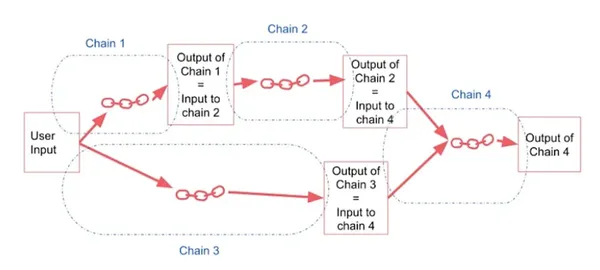




**Sequence of Operations:**
Chains define a specific order in which different components are executed.

**Combining Components:**
They allow you to connect components like language models, document loaders, other chains, and more.

**State and Memory:**
Chains can maintain state between calls, meaning the output of one step can be used as input for the next, providing context and allowing for more sophisticated interactions.

**Flexibility and Reusability:**
Chains can be reused and combined with other chains or components to create even more complex applications.

**Simple Interface:**
LangChain provides a simple interface for interacting with chains, making it easier to build and manage these sequences of operations.

Examples of what chains can do:
---------------------------------

**Breaking down complex tasks:**
A complex task can be broken down into smaller, manageable steps that are executed sequentially by different components.
Adding processing and filtering:
Chains can include additional logic to process, filter, or validate data between component calls.

**Debugging and instrumentation:**
Chains make it easier to track and debug the flow of information through a sequence of operations.

**Key concepts related to chains:**
PromptTemplate: Used to format input into a specific prompt for a language model.

**LLM:** A language model, such as those from OpenAI.
OutputParser: Used to format the output of a language model into a desired structure.

**Memory: **Can be added to a chain to maintain state between calls.
In essence, chains are the building blocks for creating more sophisticated and context-aware applications using LangChain's framework

In [ ]:
!pip install langchain-ollama

from langchain_core.prompts import ChatPromptTemplate
from langchain_ollama.llms import OllamaLLM
from IPython.display import Markdown

template = """Question: {question}

Answer: Let's think step by step."""

prompt = ChatPromptTemplate.from_template(template)
model = OllamaLLM(model="mistral")
chain = prompt | model

In [ ]:
display(Markdown(chain.invoke({"question": "Summarize the following book in 100 words: "+text})))

 1. The protagonists are two humans, Henry Ohm and Sofi, who have been conducting experiments with robots on an asteroid.
2. In the story, the robots have a high sensitivity to human thoughts and emotions, especially those of Sofi due to her hyper-thyroid condition which increases the energy level of her brain.
3. The robots respond to both Henry and Sofi's thought patterns but primarily to Sofi's because she is more dominant in influencing them. They seem to act independently based on what she expects them to do, such as going prospecting when she thought it was silly for them to work for her when they could find a mine of their own.
4. When Henry realizes the robots are only following Sofi's expectations, he decides to recommend that Sofi be returned to Earth during further experiments because she is too upsetting an influence on the robots.
5. The story ends with Henry chasing Sofi in a humorous and playful manner, reflecting their professional and personal dynamics throughout the story.

In [ ]:
display(Markdown(chain.invoke({"question": "what is the mistral model?"})))

 The Mistral model is a type of wind farm project, specifically designed for high-capacity onshore wind farms. It was developed by EDF Energies Nouvelles (now known as EDPR) in France and is named after the strong, cold, northwestern wind that blows through the Rhone Valley in France, called Mistral. The design is characterized by its row alignment, which maximizes wind turbine efficiency by ensuring that each turbine is facing the prevailing wind direction.